In [1]:
import tensorflow as tf

# Check available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs are available:")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs detected.")

2024-09-07 09:20:12.382275: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-07 09:20:12.382403: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-07 09:20:12.515852: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


GPUs are available:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
from collections import Counter

In [3]:
ds_path = Path('/kaggle/input/cottonweed/CottonWeedID15_500_UM').resolve()

In [4]:
ds_path

PosixPath('/kaggle/input/cottonweed/CottonWeedID15_500_UM')

In [5]:
paths = list(ds_path.glob('*/*'))
classes = [path.parent.stem for path in paths]

In [6]:
Counter(classes)

Counter({'Nutsedge': 450,
         'Sicklepod': 450,
         'Morningglory': 450,
         'Ragweed': 450,
         'PalmerAmaranth': 450,
         'Waterhemp': 450,
         'Crabgrass': 450,
         'Swinecress': 450,
         'Prickly Sida': 450,
         'Carpetweeds': 450,
         'SpottedSpurge': 450,
         'SpurredAnoda': 450,
         'Eclipta': 450,
         'Goosegrass': 450,
         'Purslane': 450})

In [7]:
# # label2id = {'Nutsedge': 0, 'Sicklepod': 1, 'Morningglory': 2, 'Ragweed': 3,
# #             'PalmerAmaranth': 4, 'Waterhemp': 5, 'Crabgrass': 6, 'Swinecress': 7,
# #             'Prickly Sida': 8, 'Carpetweeds': 9, 'SpottedSpurge': 10, 'SpurredAnoda': 11,
# #             'Eclipta': 12, 'Goosegrass': 13, 'Purslane': 14}
# id2label = {label2id[i]:i for i in label2id}
# class_names = [id2label[i] for i in range(len(label2id))]

# print(id2label)
# print(label2id)
# print(class_names)

In [8]:
df = pd.DataFrame({'img':paths, 'class': classes})
df['class'] = df['class'].astype('category')
df['label'] = df['class'].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   img     6750 non-null   object  
 1   class   6750 non-null   category
 2   label   6750 non-null   int8    
dtypes: category(1), int8(1), object(1)
memory usage: 66.7+ KB


In [9]:
class_labels = dict(zip(range(15), df['class'].cat.categories))
class_labels

{0: 'Carpetweeds',
 1: 'Crabgrass',
 2: 'Eclipta',
 3: 'Goosegrass',
 4: 'Morningglory',
 5: 'Nutsedge',
 6: 'PalmerAmaranth',
 7: 'Prickly Sida',
 8: 'Purslane',
 9: 'Ragweed',
 10: 'Sicklepod',
 11: 'SpottedSpurge',
 12: 'SpurredAnoda',
 13: 'Swinecress',
 14: 'Waterhemp'}

In [10]:
num_classes = len(class_labels)
num_classes

15

In [11]:
df['img']=df['img'].astype(str)
#df['label']=df['img'].astype(str)

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, shuffle=True, random_state=1230, stratify=df['label'])
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
len(train), len(test)

(4725, 2025)

In [13]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [14]:
train.head()

,index,img,class,label
0,0,/kaggle/input/cottonweed/CottonWeedID15_500_UM...,Purslane,8
1,1,/kaggle/input/cottonweed/CottonWeedID15_500_UM...,Morningglory,4
2,2,/kaggle/input/cottonweed/CottonWeedID15_500_UM...,Carpetweeds,0
3,3,/kaggle/input/cottonweed/CottonWeedID15_500_UM...,Nutsedge,5
4,4,/kaggle/input/cottonweed/CottonWeedID15_500_UM...,Waterhemp,14


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1  # Set validation split
)

In [16]:
image_size = (224, 224)  # Change based on your model's requirements
batch_size = 32

In [17]:
# Train Data Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='img',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use subset for training
)

Found 4253 validated image filenames belonging to 15 classes.


In [18]:
print("Class indices:", train_generator.class_indices)

Class indices: {'Carpetweeds': 0, 'Crabgrass': 1, 'Eclipta': 2, 'Goosegrass': 3, 'Morningglory': 4, 'Nutsedge': 5, 'PalmerAmaranth': 6, 'Prickly Sida': 7, 'Purslane': 8, 'Ragweed': 9, 'Sicklepod': 10, 'SpottedSpurge': 11, 'SpurredAnoda': 12, 'Swinecress': 13, 'Waterhemp': 14}


In [19]:
# Validation Data Generator
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='img',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use subset for validation
)

Found 472 validated image filenames belonging to 15 classes.


In [20]:
print("Class indices:", validation_generator.class_indices)

Class indices: {'Carpetweeds': 0, 'Crabgrass': 1, 'Eclipta': 2, 'Goosegrass': 3, 'Morningglory': 4, 'Nutsedge': 5, 'PalmerAmaranth': 6, 'Prickly Sida': 7, 'Purslane': 8, 'Ragweed': 9, 'Sicklepod': 10, 'SpottedSpurge': 11, 'SpurredAnoda': 12, 'Swinecress': 13, 'Waterhemp': 14}


In [21]:
# Create ImageDataGenerator for test (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# Test Data Generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='img',
    y_col='class',  # Assuming test data might still have labels, if not, use None
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'None' if no labels are available
    shuffle=False  # Important for test data to maintain order
)

Found 2025 validated image filenames belonging to 15 classes.


In [23]:
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large, VGG16,DenseNet121,ResNet50
from tensorflow.keras.applications import EfficientNetV2S, ConvNeXtSmall
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.applications.mobilenet import preprocess_input as mob_preprocess_input
from tensorflow.keras.applications.densenet import preprocess_input as dense_preprocess_input

In [24]:
#from tensorflow.keras.applications.vgg16 import preprocess_input
def buildModel(IMG_SIZE,base_model, num_classes, trainable=True):
    # Load the MobileNet model with weights pre-trained on ImageNet.
    #base_model, pooler = MobilenetV3Base((224,224,3), use='S')

    if (base_model=='DenseNet121'):
        base_model=DenseNet121(include_top=False, weights='imagenet',input_shape=IMG_SIZE)
        inputs = keras.Input(shape=IMG_SIZE, name='input')
        x = base_model(inputs)
    if(base_model=='ResNet50'):
        base_model=ResNet50(include_top=False, weights='imagenet',input_shape=IMG_SIZE)
        inputs = keras.Input(shape=IMG_SIZE, name='input')
        #x=vgg_preprocess_input(inputs)
        #x=inputs
        x = base_model(inputs)
    if (base_model=='InceptionV3'):
        base_model=InceptionV3(include_top=False, weights='imagenet',input_shape=IMG_SIZE)
        inputs = keras.Input(shape=IMG_SIZE, name='input')
        #x=vgg_preprocess_input(inputs)
        #x=inputs
        x = base_model(inputs,training=False)
    if (base_model=='EfficientNetB0'):
        base_model=EfficientNetB0(include_top=False, weights='imagenet',input_shape=IMG_SIZE)
        inputs = keras.Input(shape=IMG_SIZE, name='input')
        #x=vgg_preprocess_input(inputs)
        #x=inputs
        x = base_model(inputs)
    if (base_model=='mobilenet'):
        base_model=MobileNet(include_top=False, weights='imagenet',input_shape=IMG_SIZE)
        inputs = keras.Input(shape=IMG_SIZE, name='input')
        x=mob_preprocess_input(inputs)
        x = base_model(x, training=False)
    if(base_model=='mobilenetv2'):
        base_model=MobileNetV2(include_top=False, weights='imagenet',input_shape=IMG_SIZE)
        inputs = keras.Input(shape=IMG_SIZE, name='input')
        x=mob_preprocess_input(inputs)
        x = base_model(x, training=False)
    if(base_model=='VGG16'):
        base_model=VGG16(include_top=False, weights='imagenet',input_shape=IMG_SIZE)
        inputs = keras.Input(shape=IMG_SIZE, name='input')
        x=vgg_preprocess_input(inputs) #VGG-preprocess input did not do job well
        x = base_model(inputs)
    else:
        print("Select the correct models : VGG16, DenseNet121, mobilenet, mobilenetv2,EfficientNetB0,ResNet50,InceptionV3")

    base_model.trainable = trainable


    print("Base Model:", base_model.name)
    print(len(base_model.layers))
  
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model_name = "CottonWeed-" + base_model.name
    # Create the model.
    model = Model(inputs=inputs, outputs=outputs, name=model_name)

    return model

In [25]:
model = buildModel(image_size +(3,), base_model='ResNet50', num_classes=num_classes)
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Select the correct models : VGG16, DenseNet121, mobilenet, mobilenetv2,EfficientNetB0,ResNet50,InceptionV3
Base Model: resnet50
175


Model: "CottonWeed-resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │        30,735 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,618,447 (90.10 MB)

 Trainable params: 23,565,327 (89.89 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [26]:
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
# Constant for epochs
EPOCHS = 50

pat_es = 5
early_stopping = EarlyStopping(monitor='val_loss', patience=pat_es, verbose=1, restore_best_weights=True)
reduce_lr =ReduceLROnPlateau(monitor='val_loss',factor=0.75, patience=3, verbose=1, min_lr=1e-6)

model.compile(loss='categorical_crossentropy',
          optimizer= AdamW(learning_rate=2e-4,  weight_decay=5e-2),
          metrics=['accuracy'])

In [27]:
%%time

# Train the model
history1 = model.fit(
      train_generator,
      epochs=EPOCHS,
      validation_data=validation_generator,
      callbacks=[early_stopping, reduce_lr],
    )

print("Saving the Model")
model.save(model.name+".keras")

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725700902.947904      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1725700903.060415      67 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 763ms/step - accuracy: 0.6645 - loss: 1.0834

W0000 00:00:1725701009.314790      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


133/133 ━━━━━━━━━━━━━━━━━━━━ 191s 892ms/step - accuracy: 0.6655 - loss: 1.0801 - val_accuracy: 0.0657 - val_loss: 19.2566 - learning_rate: 2.0000e-04
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 54s 386ms/step - accuracy: 0.9050 - loss: 0.3080 - val_accuracy: 0.0657 - val_loss: 6.2532 - learning_rate: 2.0000e-04
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 54s 387ms/step - accuracy: 0.9388 - loss: 0.1900 - val_accuracy: 0.0699 - val_loss: 4.2705 - learning_rate: 2.0000e-04
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 54s 388ms/step - accuracy: 0.9621 - loss: 0.1161 - val_accuracy: 0.1059 - val_loss: 3.3972 - learning_rate: 2.0000e-04
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 54s 388ms/step - accuracy: 0.9685 - loss: 0.0954 - val_accuracy: 0.0742 - val_loss: 4.5247 - learning_rate: 2.0000e-04
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 55s 393ms/step - accuracy: 0.9621 - loss: 0.1297 - val_accuracy: 0.1780 - val_loss: 3.7158 - learning_rate: 2.0000e-04
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 54s 389ms/step 

In [28]:
# Define your folder to save results
import os
save_folder = model.name
os.makedirs(save_folder, exist_ok=True)

In [29]:
filename= model.name+'.h5'
model_weight= os.path.join(save_folder, filename)
model_weight

'CottonWeed-resnet50/CottonWeed-resnet50.h5'

In [30]:
print("Saving the Model")
model.save(model_weight)

Saving the Model


In [31]:
#image visualization
import matplotlib.pyplot as plt
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    if 'peaks' in history:
        peaks = history['peaks']
    else:
        _min = np.argmin(val_loss)
        peaks = [_min]

    epochs = range(len(acc))
    print("Total Epochs:",epochs)

    plt.figure(figsize=[16, 4])
    plt.subplot(1,2,1)
    p_value = [val_acc[p] for p in peaks]
    plt.scatter(peaks, p_value, marker='o',s=50)
    plt.plot(epochs, acc, label='Training accuracy', color='red')
    plt.plot(epochs, val_acc, label='Validation accuracy', color='magenta')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    p_value = [val_loss[p] for p in peaks]
    plt.scatter(peaks, p_value, marker='o',s=50)
    plt.plot(epochs, loss, label='Training Loss', color='red')
    plt.plot(epochs, val_loss, label='Validation Loss', color='magenta')
    plt.title('Training and validation loss')
    plt.legend()
    plt.savefig(os.path.join(save_folder, 'training_chart.png'))
    plt.show()

Total Epochs: range(0, 26)


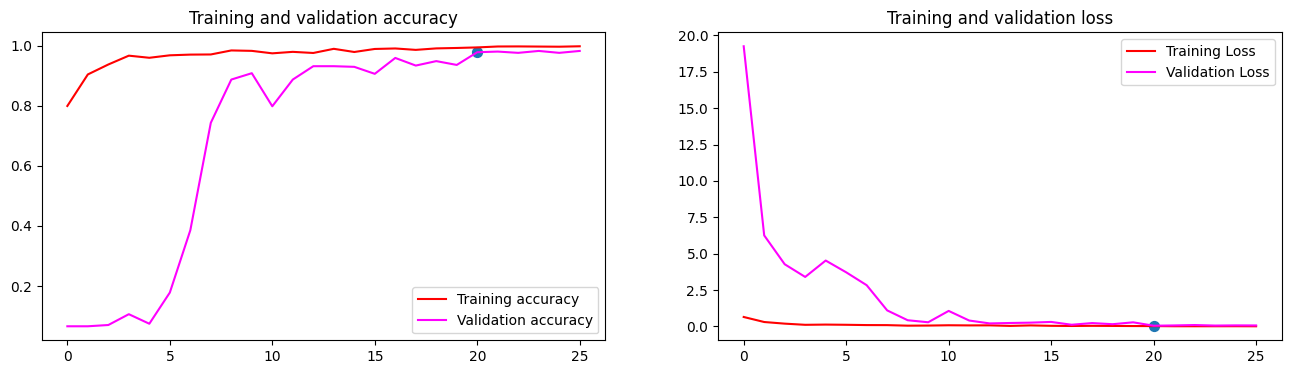

In [32]:
# Plot training results
plot_loss_acc(history1.history)

In [33]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [34]:
predictions=model.predict(test_generator)

 1/64 ━━━━━━━━━━━━━━━━━━━━ 4:22 4s/step

W0000 00:00:1725702390.023337      68 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 369ms/step


In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
# Get true labels from the test generator
true_labels = test_generator.classes
# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[131   0   1   0   0   0   1   0   1   0   0   0   0   0   1]
 [  0 133   0   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 132   1   1   0   0   1   0   0   0   0   0   0   0]
 [  0   1   0 134   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0 134   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0 134   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   2   0 130   0   0   1   0   1   0   0   0]
 [  0   0   0   0   1   0   3 131   0   0   0   0   0   0   0]
 [  1   0   1   0   3   0   0   0 129   0   1   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0 134   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0 133   0   0   0   0]
 [  0   0   1   0   0   0   0   1   1   0   1 131   0   0   0]
 [  0   0   0   0   3   0   0   0   0   0   0   0 132   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 135   0]
 [  0   0   2   0   1   0   4   0   0   0   0   0   0   0 128]]


In [36]:
def eval_model(model, data_gen, use_rand_guess=False):
    print("model.evaluate")
    #model.evaluate(data_gen)

    print("model.predict")
    actual_labels = []
    pred_prob = []
    for batch in tqdm(data_gen):
        actual_labels.extend([np.argmax(z) for z in batch[1]])
        pred_prob.extend(list(model(batch[0], training=False)))

    return actual_labels, pred_prob

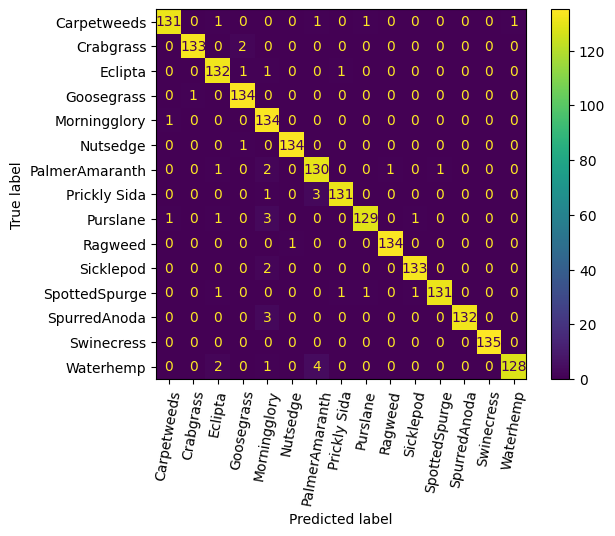

In [37]:
cmd = ConfusionMatrixDisplay.from_predictions(
        true_labels, predicted_classes,
        display_labels=list(test_generator.class_indices.keys()),
        xticks_rotation=80, #'vertical',
        # ax = ax
    )
    # fig, ax = plt.subplots(figsize=(25,5))
    # cmd.plot(ax=ax)
plt.savefig(os.path.join(save_folder, 'confusion-mat.png'))
plt.show()

In [38]:
display_labels=list(test_generator.class_indices.keys())
class_report=classification_report(true_labels, predicted_classes,digits=5, target_names=display_labels)
print(class_report)
with open(os.path.join(save_folder, 'classification_report.txt'), 'w') as f:
    f.write(classification_report(true_labels, predicted_classes))

                precision    recall  f1-score   support

   Carpetweeds    0.98496   0.97037   0.97761       135
     Crabgrass    0.99254   0.98519   0.98885       135
       Eclipta    0.95652   0.97778   0.96703       135
    Goosegrass    0.97101   0.99259   0.98168       135
  Morningglory    0.91156   0.99259   0.95035       135
      Nutsedge    0.99259   0.99259   0.99259       135
PalmerAmaranth    0.94203   0.96296   0.95238       135
  Prickly Sida    0.98496   0.97037   0.97761       135
      Purslane    0.98473   0.95556   0.96992       135
       Ragweed    0.99259   0.99259   0.99259       135
     Sicklepod    0.98519   0.98519   0.98519       135
 SpottedSpurge    0.99242   0.97037   0.98127       135
  SpurredAnoda    1.00000   0.97778   0.98876       135
    Swinecress    1.00000   1.00000   1.00000       135
     Waterhemp    0.99225   0.94815   0.96970       135

      accuracy                        0.97827      2025
     macro avg    0.97889   0.97827   0.97837 